In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv(r"C:\Users\mayur\Downloads\2nd - SVM\SVM\pulsar_data_test.csv")

df = dataset.head()
print(df)


    Mean of the integrated profile  \
0                       116.906250   
1                        75.585938   
2                       103.273438   
3                       101.078125   
4                       113.226562   

    Standard deviation of the integrated profile  \
0                                      48.920605   
1                                      34.386254   
2                                      46.996628   
3                                      48.587487   
4                                      48.608804   

    Excess kurtosis of the integrated profile  \
0                                    0.186046   
1                                    2.025498   
2                                    0.504295   
3                                    1.011427   
4                                    0.291538   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.129815                   3.037625   
1                        

In [3]:
df.shape

(5, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [5]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
df.columns = ['IP Mean','IP Sd','IP Kurtosis','IP Skewness','DM-SNR Mean', 'DM-SNR SD', 'DM-SNR Skewness','DM-SNR Kurtosis','target_class']

In [9]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR SD', 'DM-SNR Skewness', 'DM-SNR Kurtosis', 'target_class'],
      dtype='object')

In [10]:
df['target_class'].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df['target_class'].value_counts() / float(len(df))


Series([], Name: count, dtype: float64)

Exploring missing values in variables

In [12]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR SD          0
DM-SNR Skewness    0
DM-SNR Kurtosis    0
target_class       5
dtype: int64

outliers in numericals variables

In [13]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR SD,DM-SNR Skewness,DM-SNR Kurtosis,target_class
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.0
mean,102.01,45.50,0.80,2.16,19.45,32.66,5.91,52.08,NaN
std,16.19,6.26,0.75,3.66,34.94,27.60,3.51,42.71,NaN
min,75.59,34.39,0.19,-0.13,2.24,15.62,0.49,-1.12,NaN
25%,101.08,47.00,0.29,0.29,3.04,17.74,4.54,21.71,NaN
50%,103.27,48.59,0.50,0.82,3.77,21.90,7.05,55.88,NaN
75%,113.23,48.61,1.01,1.15,6.29,26.59,8.12,78.81,NaN
max,116.91,48.92,2.03,8.65,81.89,81.46,9.33,105.13,NaN


Text(0, 0.5, 'DM-SNR Skewness')

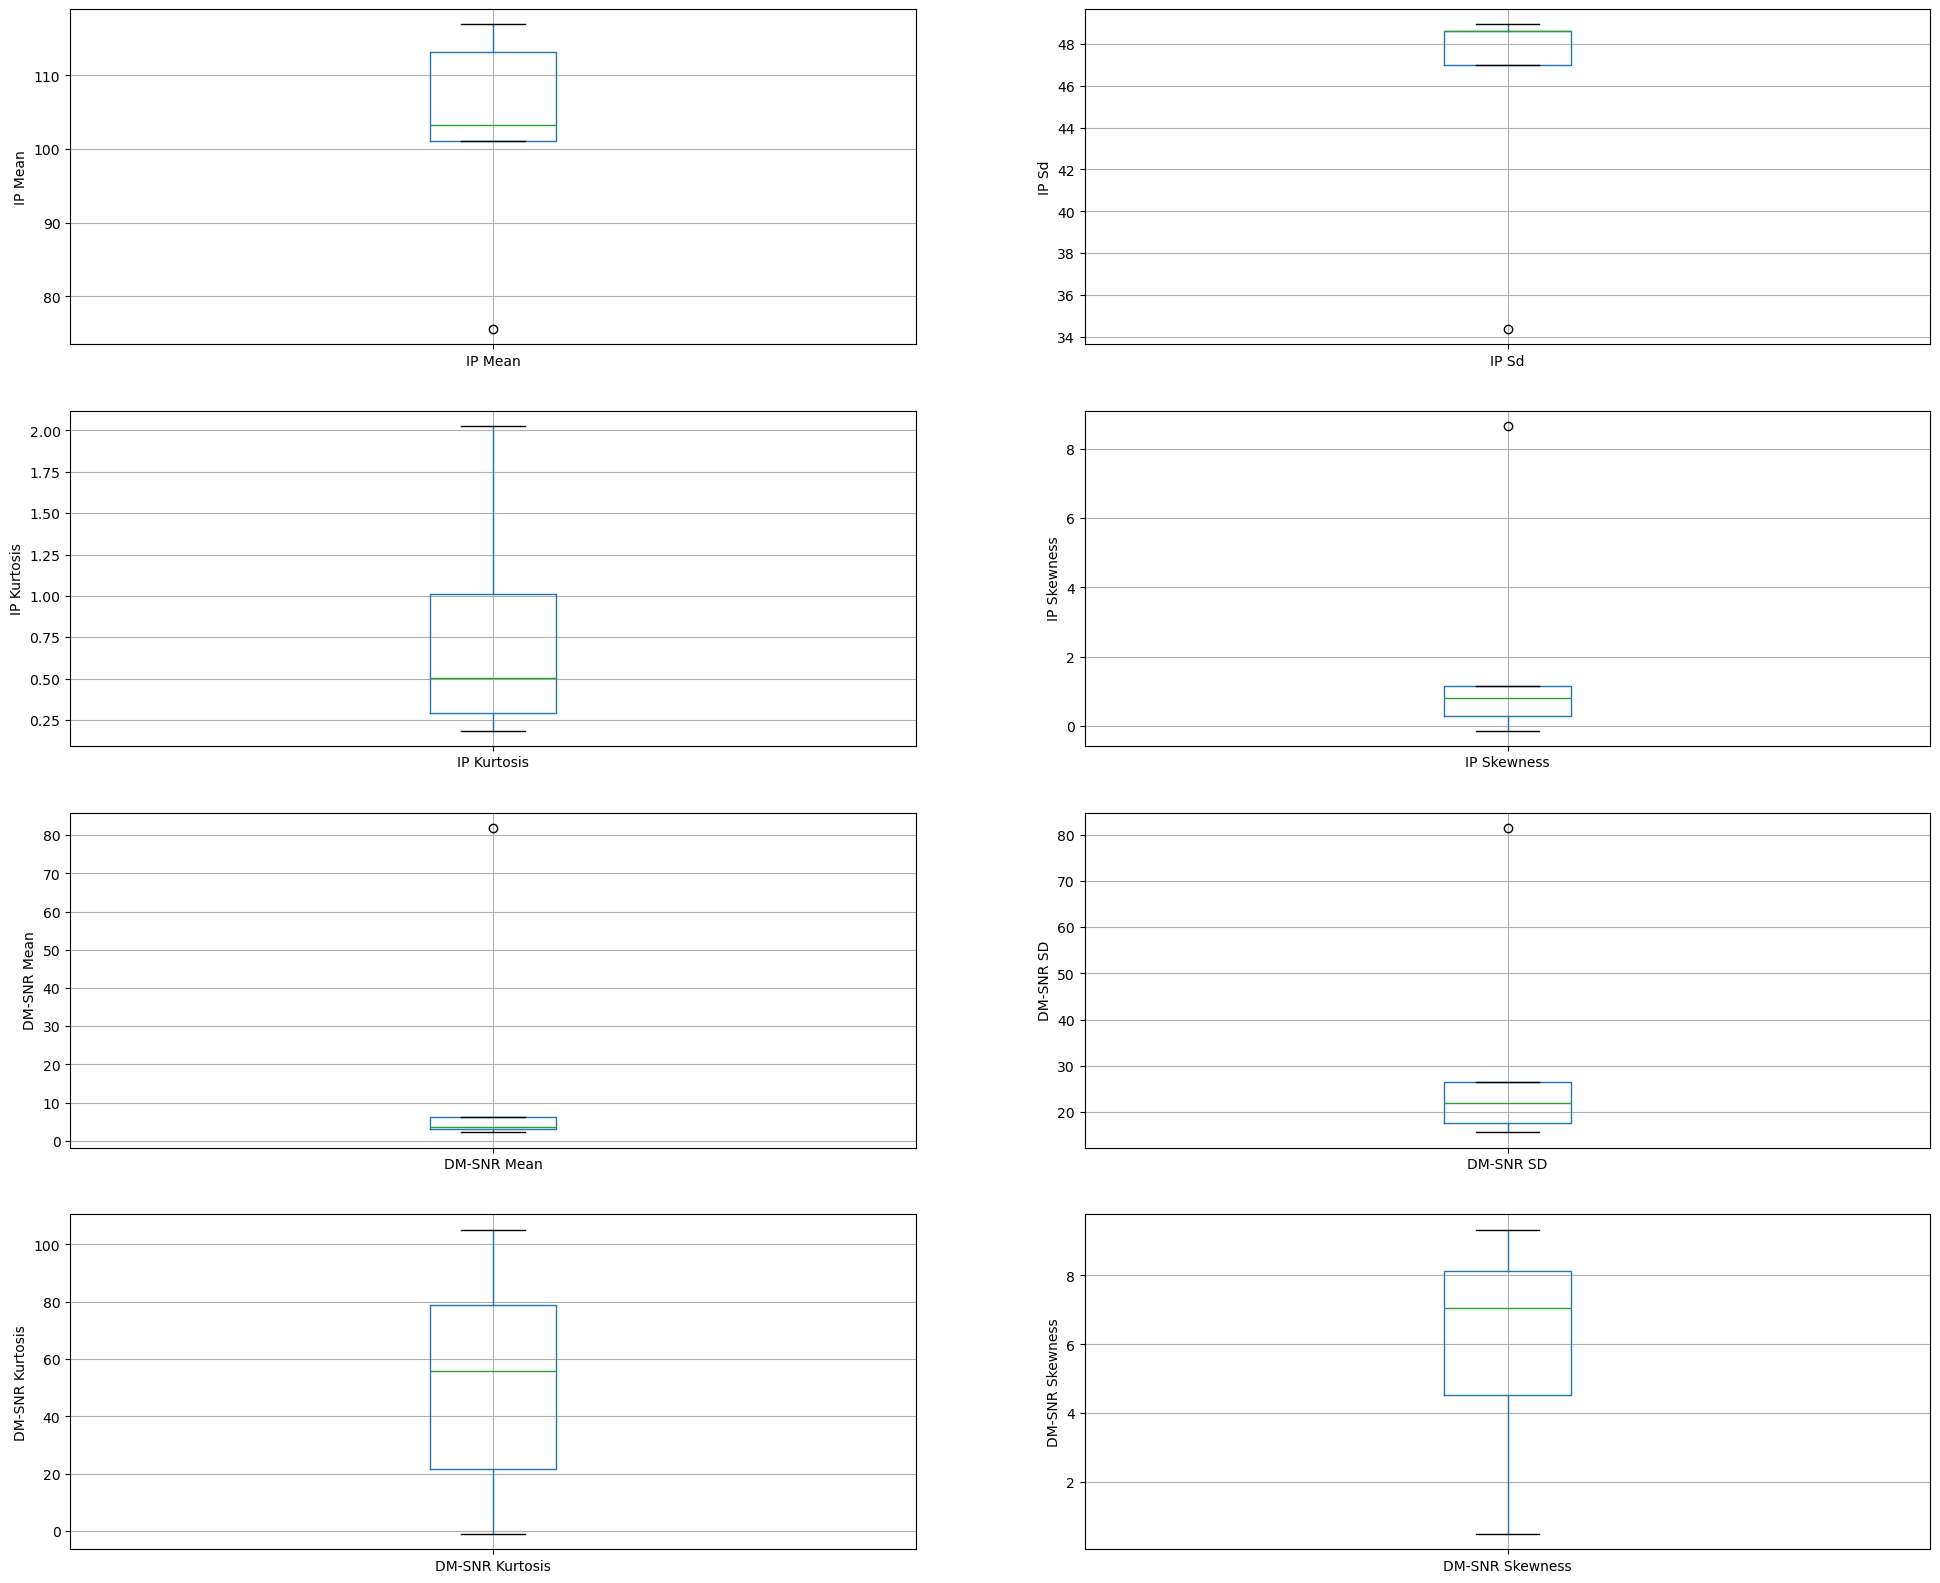

In [14]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR SD')
fig.set_title('')
fig.set_ylabel('DM-SNR SD')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

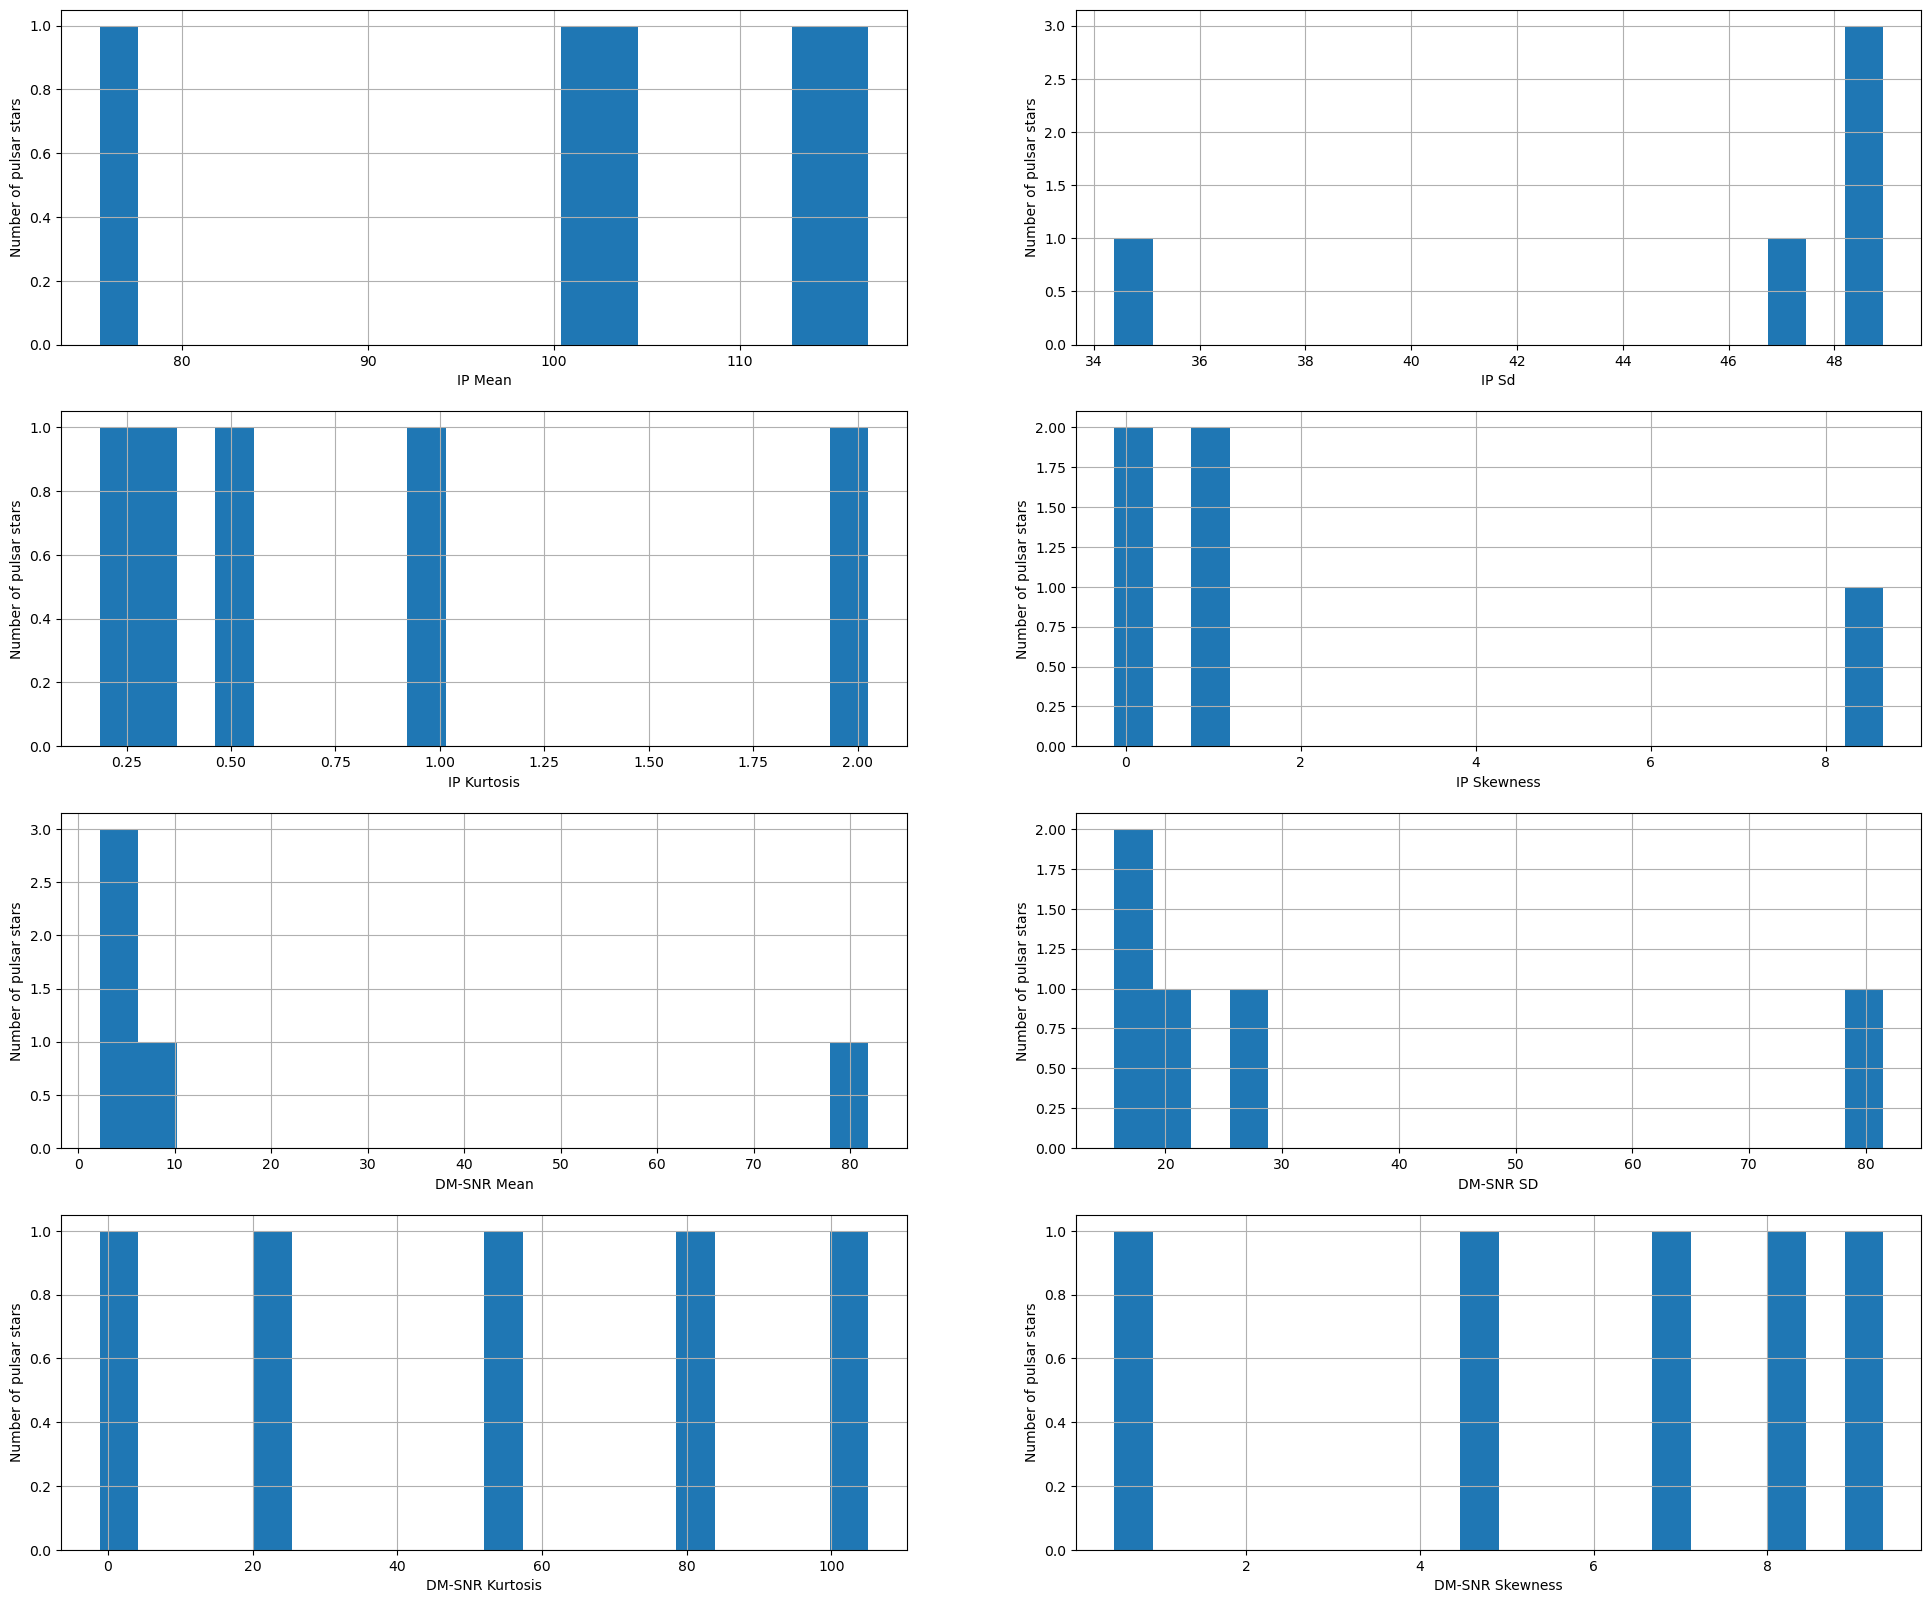

In [15]:


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR SD'].hist(bins=20)
fig.set_xlabel('DM-SNR SD')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

Declare features vector and target variable

In [16]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

Split data into separate traning and test set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [18]:
X_train.shape, X_test.shape

((4, 8), (1, 8))

Feature Scaling

In [19]:
cols = X_train.columns

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [21]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [22]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [23]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR SD,DM-SNR Skewness,DM-SNR Kurtosis
count,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,2.775558e-17,-2.775558e-16,0.000000,-1.110223e-16,0.000000,-8.326673e-17,-2.289835e-16,-1.387779e-16
std,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00
min,-1.614499e+00,-1.731659e+00,-0.943075,-7.308585e-01,-0.616489,-7.404883e-01,-1.553303e+00,-1.299489e+00
25%,-4.324250e-01,-1.428742e-02,-0.835340,-6.426367e-01,-0.600247,-6.200584e-01,-5.182206e-01,-7.424641e-01
50%,3.371490e-01,5.598885e-01,-0.309299,-4.933868e-01,-0.557221,-4.894371e-01,2.536080e-01,-8.820930e-04
75%,7.695740e-01,5.741759e-01,0.526041,1.492498e-01,0.043025,1.306213e-01,7.718286e-01,7.415821e-01
max,9.402013e-01,6.118823e-01,1.561673,1.717632e+00,1.730931,1.719362e+00,1.046087e+00,1.301254e+00


Run SVM with default hyperparameter

In [24]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

svc=SVC() 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input y contains NaN.

In [25]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input y contains NaN.

Run SVM with rbf kernek and C = 100.0

In [ ]:
svc=SVC(C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
svc = SVC(kernel="rbf", C=100.0, random_state=42)

svc.fit(X_train, y_train)


# 8️⃣ Prediction
y_pred = svc.predict(X_test)

print("Predictions generated:", len(y_pred))

In [26]:
# ===============================
# FINAL SVM FIX (JUPYTER)
# ===============================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 1️⃣ Load dataset
df = pd.read_csv(
    r"C:\Users\mayur\Downloads\2nd - SVM\SVM\pulsar_data_test.csv"
)

print("Loaded shape:", df.shape)


# 2️⃣ Identify target column (last column)
target_col = df.columns[-1]
print("Target column:", target_col)


# 3️⃣ FORCE target cleaning (THIS IS THE FIX)
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")

# Drop rows with NaN target
df = df.dropna(subset=[target_col])

print("After cleaning shape:", df.shape)
print("Target values:\n", df[target_col].value_counts())


# 4️⃣ Prepare X and y
X = df.drop(target_col, axis=1)
y = df[target_col]

# Convert ALL features to numeric
X = X.apply(pd.to_numeric, errors="coerce")

# Fill feature NaN
X = X.fillna(X.median())

# 🔐 FINAL CHECK
print("NaN in y:", y.isnull().sum())


# 5️⃣ Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("NaN in y_train:", y_train.isnull().sum())


# 6️⃣ Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 7️⃣ SVM (RBF kernel)
svc = SVC(kernel="rbf", C=100.0, random_state=42)

svc.fit(X_train, y_train)


# 8️⃣ Prediction
y_pred = svc.predict(X_test)

print("Predictions generated:", len(y_pred))


# 9️⃣ Accuracy
print(
    "Model accuracy:",
    accuracy_score(y_test, y_pred)
)


Loaded shape: (5370, 9)
Target column: target_class
After cleaning shape: (0, 9)
Target values:
 Series([], Name: count, dtype: int64)
NaN in y: 0


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1️⃣ Load TRAIN dataset (IMPORTANT)
df = pd.read_csv(
    r"C:\Users\mayur\Downloads\2nd - SVM\SVM\pulsar_data_test.csv"
)

print("Dataset shape:", df.shape)
print(df.columns)

# 2️⃣ Target column (last column)
target_col = df.columns[-1]

# 3️⃣ Clean target
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
df = df.dropna(subset=[target_col])

# 4️⃣ Features & target
X = df.drop(target_col, axis=1)
y = df[target_col]

X = X.apply(pd.to_numeric, errors="coerce")
X = X.fillna(X.median())

print("Final samples:", len(y))
print(y.value_counts())

# 5️⃣ Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 6️⃣ Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7️⃣ SVM (RBF, C=100)
svc = SVC(kernel="rbf", C=100.0, random_state=42)
svc.fit(X_train, y_train)

# 8️⃣ Prediction
y_pred = svc.predict(X_test)

# 9️⃣ Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Dataset shape: (5370, 9)
Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')
Final samples: 0
Series([], Name: count, dtype: int64)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.